In [3]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import spacy
# import wordcloud
# import en_core_web_sm
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stops = stopwords.words('english')
stops_dict = {}
for word in stops:
    stops_dict[word]=""

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import os
abspath = os.path.abspath('D:/Box Sync/editorials/scripts/')
os.chdir(abspath)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

print("done")

done


In [4]:
# full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"
frequency_filename = "../data/frequency_wordlex.csv"


full_df = imp.init_df(full_filename, "full")
full_df = full_df[full_df["year"]<2020]

print("done")

done


In [5]:
frequency_filename = "../data/frequency_wordlex.csv"

frequency = pd.read_csv(frequency_filename)
frequency[:5]

,still,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD
0,the,1501908,8388,1339811,8388,29449.18,6.1766,100.00,3.9237
1,to,1156570,8383,1138435,8380,22677.84,6.0632,99.94,3.9235
2,a,1041179,8382,976941,8380,20415.27,6.0175,99.93,3.9234
3,you,2134713,8381,1595028,8376,41857.12,6.3293,99.92,3.9233
4,and,682780,8379,515365,8374,13387.84,5.8343,99.89,3.9232


In [6]:
full_df = full_df.drop(
    [
        "date",
        "time",
        "date_seq",
        "column1",
        "column2",
        "one_time",
        "working_life",
        "career_related_policy",
        "career_profiles",
        "bio",
    ],
    axis=1,
)

full_df.head()

,id,headline,tags,authors,text,month_seq,year,advice,author,n_posts_author,category
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,"bywelcome to ""tooling up,"" a monthly column about job hunting and career development for scienti...",10,1996,yes,peter fiske,59,advice
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,"by've always hated the term ""cover letter."" it implies that the letter you send out to accompany...",12,1996,yes,peter fiske,59,advice
2,5840,dressing scientists for success: male case study,"[tooling up, advice, graduate, postdoc, academic, industry, americas]",peter fiske,"bye all know that, with respect to fashion, the world holds a rather dim view of scientists like...",21,1997,yes,peter fiske,59,advice
3,5841,the tooling up book club: on the market,"[tooling up, advice, graduate, postdoc, academic, americas]",peter fiske,"byow that the holiday season is over, you have returned to your regular life, in the lab, in sch...",25,1998,yes,peter fiske,59,advice
4,5847,self-assessment exercises: a gre for your ego and superego,"[tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...",peter fiske,by--miguel de cervantesany young scientists who explore nontraditional careers are seeking more ...,26,1998,yes,peter fiske,59,advice


In [7]:
text_clean = []

for i in range(len(full_df)):
    text = full_df.iloc[i]["text"][2:]
    text = clh.no_punctuation(text, quotes=False, frequency_prep=True)
    text_clean.append(text)

full_df["text"]=text_clean

first do regular text frequency

In [8]:
# stops = stopwords.words('english')
# stops_dict = {}
# for word in stops:
#     stops_dict[word]=""

# text_clean = []

# for i in range(len(full_df)):
#     text = full_df.iloc[i]["text"][2:]
#     # print(text)
#     text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
#     # print(text)
#     text_clean.append(text)

# full_df["text_stopped"]=text_clean

# full_df["text_stopped"][30]
full_df.head()

,id,headline,tags,authors,text,month_seq,year,advice,author,n_posts_author,category
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,welcome to tooling up a monthly column about job hunting and career development for scientist...,10,1996,yes,peter fiske,59,advice
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,ve always hated the term cover letter it implies that the letter you send out to accompany yo...,12,1996,yes,peter fiske,59,advice
2,5840,dressing scientists for success: male case study,"[tooling up, advice, graduate, postdoc, academic, industry, americas]",peter fiske,e all know that with respect to fashion the world holds a rather dim view of scientists like u...,21,1997,yes,peter fiske,59,advice
3,5841,the tooling up book club: on the market,"[tooling up, advice, graduate, postdoc, academic, americas]",peter fiske,ow that the holiday season is over you have returned to your regular life in the lab in schoo...,25,1998,yes,peter fiske,59,advice
4,5847,self-assessment exercises: a gre for your ego and superego,"[tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...",peter fiske,--miguel de cervantesany young scientists who explore nontraditional careers are seeking more th...,26,1998,yes,peter fiske,59,advice


In [22]:
def add_to_freq_dict(text, word_dict): #, lemm=False
    text = " ".join(text.split())
    for word in text.split(" "):
        # if lemm==True:
        #     word = lemmatize_word(word)
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return(word_dict)

def lemmatize_text(text):
    weird_plurals = {"postdocs":"postdoc","students":"student","scientists":"scientist","says":"say"}
    text = " ".join(text.split())
    lemm_text=[]
    for word in text.split(" "):
        # if word == "says":
        #     print(word)
        #     word = lemmatizer.lemmatize(word)
        #     print(word)
        #     print("==========")
        word = lemmatizer.lemmatize(word)

        if word in weird_plurals.keys():
            word = weird_plurals[word]
        lemm_text.append(word)
    text = " ".join(lemm_text)
    return(text)

In [10]:
# extra_stops = ["also","new","time","many","would","get","may","like","first","u"]
# word_dict = {}

# for i in range(len(full_df)):
#     text = full_df.iloc[i]["text_stopped"]
#     # print(text)
#     text = add_to_freq_dict(text, word_dict, lemm=True)
#     # print(text)

# # print([(key, word_dict[key]) for key in word_dict][:10])

In [11]:
# Create a list of tuples sorted by index 1 i.e. value field     
def dict_to_top(w_dict, n, reverse=True):
    listofTuples = sorted(w_dict.items() ,reverse=reverse,  key=lambda x: x[1])
    top = {"word":[], "freq":[]}
    rank_dict = {}
    count=0

    # Iterate over the sorted sequence
    for elem in listofTuples :
        if count >n:
            break
        # print(elem[0] , " ::" , elem[1] )
        top["word"].append(elem[0])
        top["freq"].append(elem[1])
        count+=1

    return(top)
# top = dict_to_top(word_dict, 40)

In [12]:
# plt.figure(figsize=(12, 10))
# plt.barh(top["word"],top["freq"])
# # plt.invert_yaxis()

In [18]:

def freq_workflow(df, n_facets, extras, lemm=False):
    stops = stopwords.words('english')
    interval = int(24/n_facets)
    stops_dict = {}
    facets = {}

    for word in stops:
        stops_dict[word]=""

    for i in range(n_facets):
        start = i*interval+1996
        end = start+interval
        facets[start] = df[(df.year<=start) & (df.year <end)]
    
    for keya in facets:

        text_list = facets[keya]["text"]

        word_dict = {}
        text_clean = []

        for text in text_list:
            text = clh.only_letters_clean(text)
            # print(text)
            if lemm==True:
                text = lemmatize_text(text)
            text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
            word_dict = add_to_freq_dict(text, word_dict) #, lemm=lemm

        top = dict_to_top(word_dict, 40)
        # print(top)
        # print(top["word"])
        plt.figure(figsize=(12, 10))
        plt.barh(top["word"],top["freq"])
        plt.savefig(str(keya)+"-frequency.png")
    

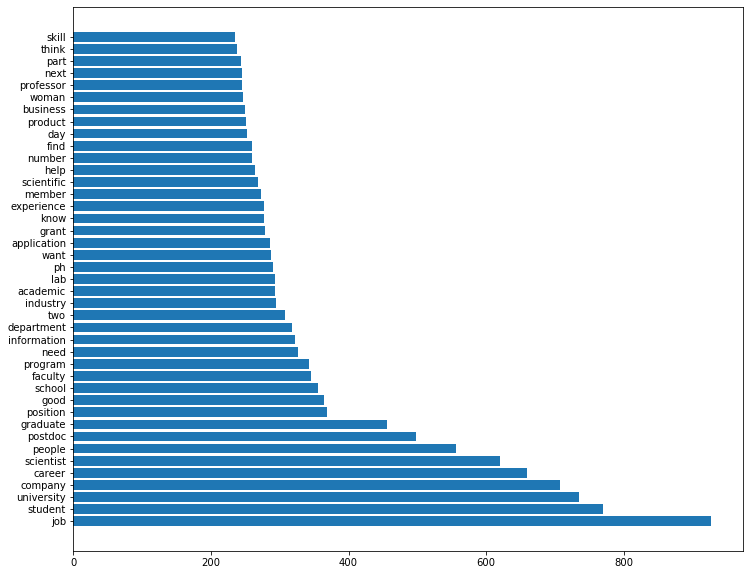

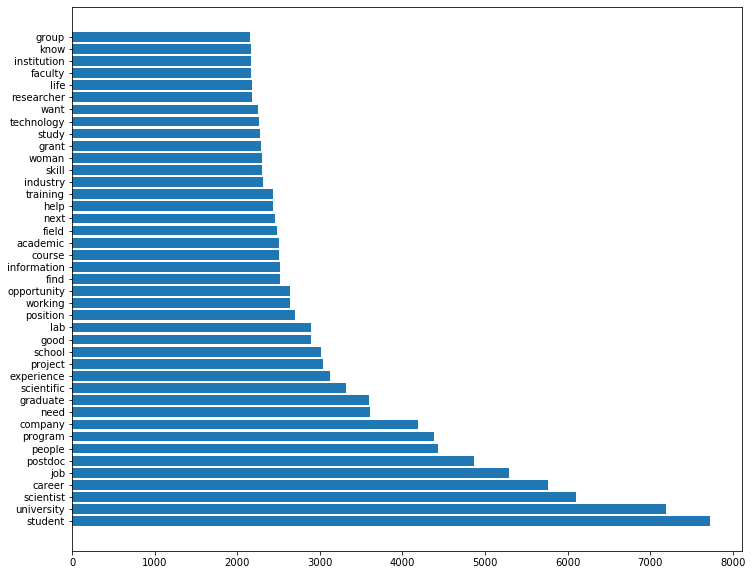

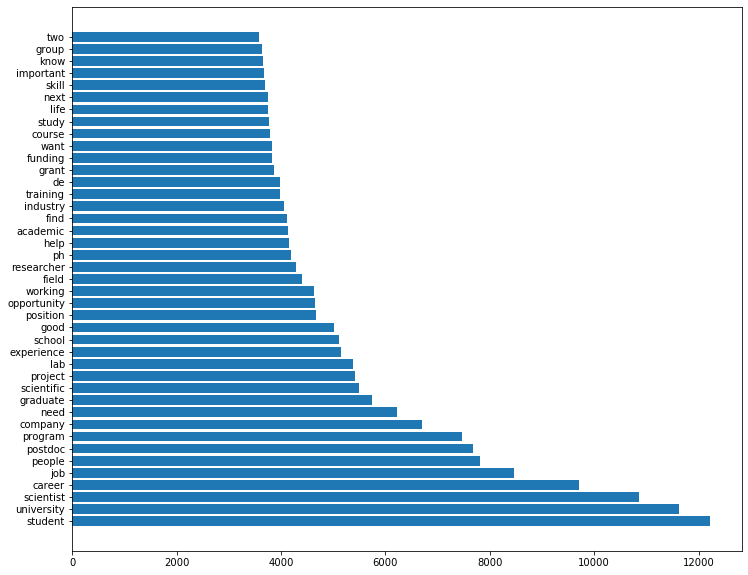

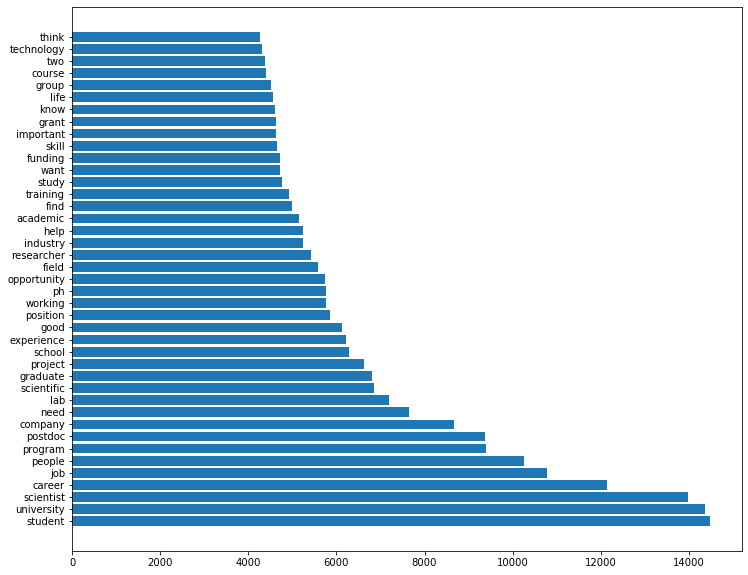

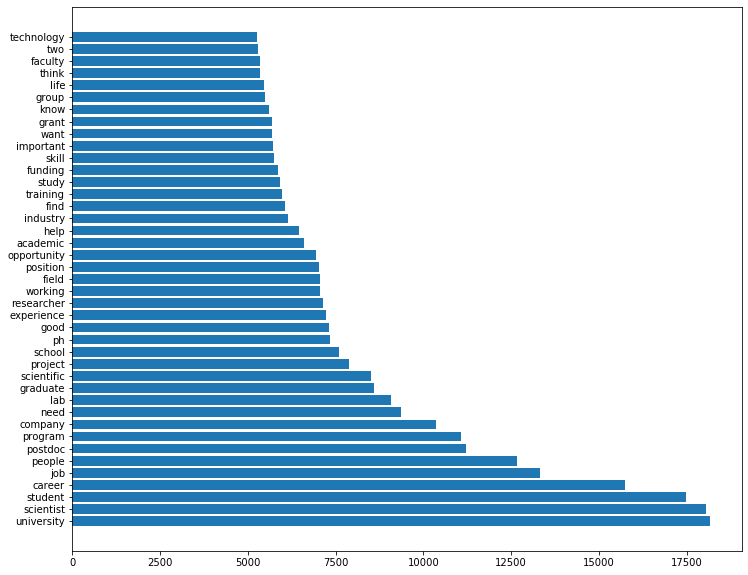

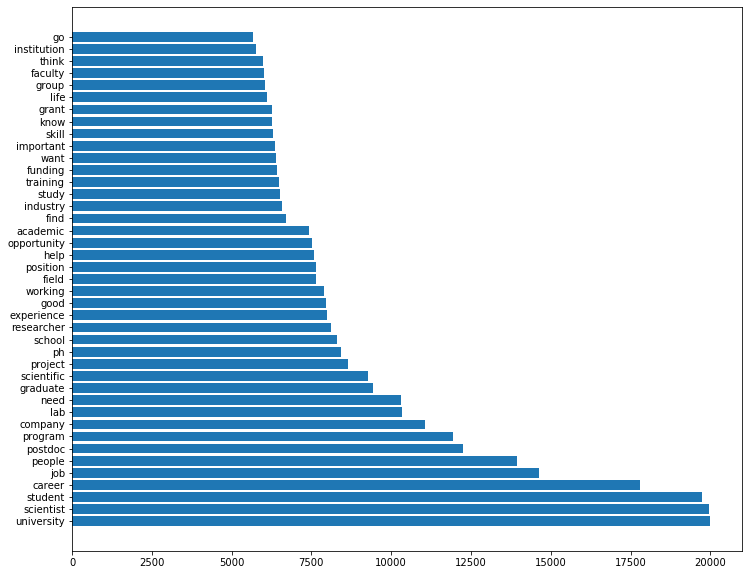

In [90]:
extra_stops = ["also","new","time","many","would","get","may","like","first","u","science","research","say","one","year","","says","work","wa", "ha", "dont","take","well","thing","much","even","way","make","could", "go","need","know","de"]

freq_workflow(df=full_df, n_facets=6,extras=extra_stops, lemm=True)

redo these based on the proportions of the words over the proportion for all words 

In [39]:
text_list = full_df["text"]
word_dict = {}

for text in text_list:
    text = clh.only_letters_clean(text)
    text = lemmatize_text(text)
    text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
    text = add_to_freq_dict(text, word_dict) #, lemm=True

In [40]:
total = sum(word_dict.values())
word_prop = {}

for key in word_dict:
    prop = word_dict[key]/total
    word_prop[key] = prop

In [59]:
def comp_prop_workflow(df, n_facets, extras, total, full_freq_dict,reverse=False, lemm=False):
    stops = stopwords.words('english')
    interval = int(24/n_facets)
    stops_dict = {}
    facets = {}

    for word in stops:
        stops_dict[word]=""

    for i in range(n_facets):
        start = i*interval+1996
        end = start+interval
        facets[start] = df[(df.year<=start) & (df.year <end)]
    
    for keya in facets.keys():
        # print(keya, type(keya))
        text_list = facets[keya]["text"]
        # print(len(text_list))

        word_dict = {}
        # print(word_dict)
        prop_dif = {}
        facet_prop = {}
        complex_dict = {}
        text_clean = []


        for text in text_list:
            text = clh.only_letters_clean(text)
            if lemm==True:
                text = lemmatize_text(text)
            text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
            word_dict = add_to_freq_dict(text, word_dict)
        
        facet_total = sum(word_dict.values())

        for keyb in word_dict:
            prop = word_dict[keyb]/facet_total
            # print(word_dict[key],(full_freq_dict[key],facet_total,total))
            # if keya != 1996:
            #     print(word_dict[keyb],(full_freq_dict[keyb],facet_total,total))
            complex_prop = word_dict[keyb]/(full_freq_dict[keyb]*facet_total/total)
            # print(complex_prop)
            facet_prop[keyb] = prop
            complex_dict[keyb] = complex_prop
            # prop_dif[key]=difs


        top = dict_to_top(complex_dict, 30, reverse=False)
        # print(top)

        plt.figure(figsize=(12, 10))
        plt.barh(top["word"],top["freq"])
        # print("hi")
        # plt.xscale("log")
    

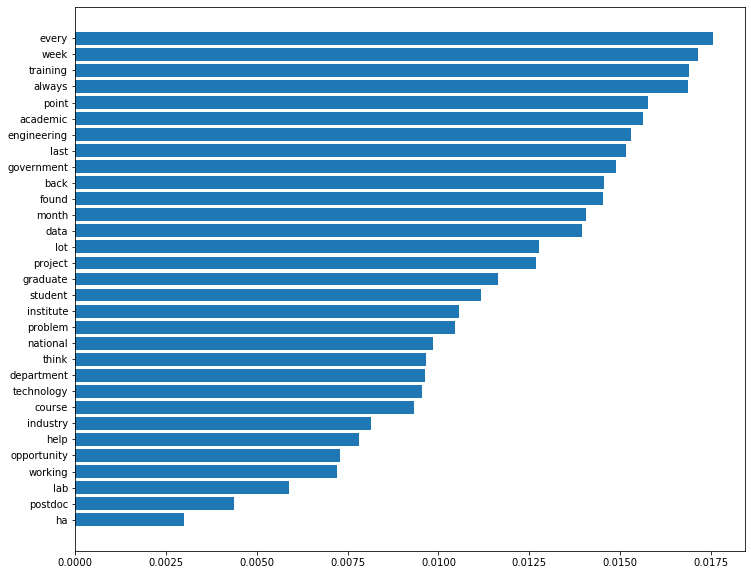

In [89]:
comp_prop_workflow(df=full_df, n_facets=1, extras=extra_stops, total=total, full_freq_dict=word_dict, lemm=True)

In [72]:
def word_rank_facets(facet_word_dict, rank_dict):
    # print(len(rank_dict))

    listofTuples = sorted(facet_word_dict.items() ,reverse=False,  key=lambda x: x[1])
    top = {"word":[], "freq":[]}

    facet_rank_dict={}

    count=1
    for elem in listofTuples:
        facet_rank_dict[elem[0]]=count
        count+=1
    
    for key in rank_dict:
        if key in facet_rank_dict:
            rank_dict[key].append(facet_rank_dict[key])
        else:
            rank_dict[key].append(len(facet_rank_dict)+1)
    return(rank_dict)


In [86]:
rank_dict = {}
for key in word_dict:
    rank_dict[key]=[]

# comp_prop_workflow(df=full_df, n_facets=2, extras=extra_stops, total=total, prop_dict=word_prop, lemm=True)
df=full_df
n_facets=8
extras=extra_stops
total=total
# prop_dict=word_prop
lemm=True
# print(len(rank_dict))

# print(len(prop_dict))

stops = stopwords.words('english')
interval = int(24/n_facets)
stops_dict = {}
facets = {}

for word in stops:
    stops_dict[word]=""

for i in range(n_facets):
    start = i*interval+1996
    end = start+interval
    facets[start] = df[(df.year<=start) & (df.year <end)]

for key in facets:
    print(key)

    text_list = facets[key]["text"]

    facet_dict = {}
    # prop_dif = {}
    facet_prop = {}
    complex_dict = {}
    text_clean = []

    for text in text_list:
        text = clh.only_letters_clean(text)
        if lemm==True:
            text = lemmatize_text(text)
        text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
        facet_dict = add_to_freq_dict(text, word_dict)
    # print(text)

    facet_total = sum(word_dict.values())/n_facets

    for key in facet_dict:
        prop = facet_dict[key]/facet_total
        facet_prop[key]=prop
        complex_prop = facet_dict[key]/(word_dict[key]*facet_total/total)
        complex_dict[key] = complex_prop

    rank_dict = word_rank_facets(complex_dict, rank_dict)

top = dict_to_top(word_dict, 30)
top["ranks"] = []
top["years"] = [year for year in facets.keys()]

for word in top["word"][:30]:
    top["ranks"].append(rank_dict[word])

print(top["ranks"])

1996
1999
2002
2005
2008
2011
2014
2017
[[54667, 85964, 5803, 16913, 10447, 36, 1816, 27828], [562, 86226, 6613, 232, 11227, 597, 2637, 28660], [54638, 1, 5757, 16863, 87202, 48523, 1769, 27783], [174, 14908, 6010, 17108, 10639, 177, 83744, 28037], [4, 14680, 5755, 111488, 10400, 2, 1768, 27781], [3, 14678, 5753, 16860, 87200, 48521, 1766, 1], [54650, 14698, 5774, 16882, 10420, 48535, 1785, 3], [54643, 85950, 5764, 16870, 10409, 8, 1776, 27791], [985, 159, 7351, 18346, 11878, 1130, 3364, 29402], [54852, 14993, 6100, 17199, 10726, 48731, 2100, 89], [54711, 14785, 105612, 16983, 10517, 93, 1887, 27903], [54, 14739, 5827, 16938, 87222, 48563, 1835, 27852], [193, 14936, 6042, 111508, 10669, 203, 2038, 28070], [215, 86041, 26, 17160, 10691, 48708, 2062, 28096], [522, 86208, 6557, 17646, 87429, 560, 2579, 28603], [54972, 15138, 105702, 17361, 10883, 48844, 2277, 28285], [54820, 86033, 105642, 78, 87281, 206, 2044, 72], [194, 14937, 6043, 17137, 10670, 48690, 2039, 28071], [40, 14724, 5806, 1

No handles with labels found to put in legend.


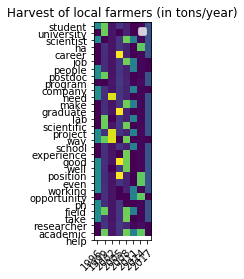

<Figure size 864x720 with 0 Axes>

In [87]:
rank_array = np.array(top["ranks"])
# print(rank_array)
top_words = top["word"]
# year_blocks = ["1996","2008"]
year_blocks = top["years"]

fig, ax = plt.subplots()
im = ax.imshow(rank_array)

# We want to show all ticks...
ax.set_xticks(np.arange(len(year_blocks)))
ax.set_yticks(np.arange(len(top_words)))
# ... and label them with the respective list entries
ax.set_xticklabels(year_blocks)
ax.set_yticklabels(top_words)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(top_words)-1):
#     for j in range(len(year_blocks)):
#         text = ax.text(j, i, rank_array[i, j],
#                        ha="center", va="center", color="w")

plt.figure(figsize=(12, 10))
ax.set_title("Harvest of local farmers (in tons/year)")
ax.legend()
# fig.tight_layout()
plt.show()


# restart analyses with the words that are disproportionately in careers

In [67]:
frequency_filename = "../data/frequency_wordlex.csv"

frequency = pd.read_csv(frequency_filename)
frequency.head()

,still,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD
0,the,1501908,8388,1339811,8388,29449.18,6.1766,100.00,3.9237
1,to,1156570,8383,1138435,8380,22677.84,6.0632,99.94,3.9235
2,a,1041179,8382,976941,8380,20415.27,6.0175,99.93,3.9234
3,you,2134713,8381,1595028,8376,41857.12,6.3293,99.92,3.9233
4,and,682780,8379,515365,8374,13387.84,5.8343,99.89,3.9232
